## This notebook is meant to be run from COLAB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import pickle
import random
from sklearn.model_selection import train_test_split


## Mounting GDrive

In [5]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')
# drive.mount('/content/drive/My\ Drive/Colab\ Notebooks/IDRID')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
# cd 'My Drive'
cd 'drive/My Drive/Colab_Notebooks/IDRID/'

/content/drive/My Drive/Colab_Notebooks/IDRID


In [8]:
ls

angel_blindness_detection.ipynb  trainedmodel_50Epoch.h5
cnn1_trained.h5                  trainHistoryOld
history.pickle                   train_images/
img_400_gray_brightness.pickle   training_data_brightness.pickle
model_trained.h5                 training_data.pickle
model_trained_sendexv6.h5        X_brightness.pickle
model_trained_sendexv7.h5        X.pickle
sentdex_v2.ipynb                 x_train.pickle
sentdex_v3                       y_brightness.pickle
test.csv                         y.pickle
train.csv                        y_train.pickle


## Load image data from pickle file and store it in 'training_data' array

In [0]:
pickle_in = open("training_data_brightness.pickle2","rb")
# pickle_in = open("img_400_gray_brightness.pickle","rb")
training_data = pickle.load(pickle_in)

## Create X_train, X_test, y_train, y_test
## This cell must be run each time the model will be trained

In [0]:
random.shuffle(training_data)

# IMG_SIZE = 400
IMG_SIZE = 224

X = []
y = []

# This for loop reads data and creates X and y
for features,label in training_data:
    X.append(features)
    y.append(label)

    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y).reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


In [0]:
# X_train.shape

In [0]:
# X_test[[0],:].shape

## Train the MODEL

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

X_train = X_train/255.0
y_train = to_categorical(y_train)
X_test = X_test/255.0
y_test = to_categorical(y_test)


# Here is the model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())

# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

model.add(Dense(5))
# model.add(Activation('sigmoid'))
# softmax is commonly used for classification of multiple categories
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
#               optimizer='sgd',
#               optimizer='rmsprop',
              metrics=['accuracy'])              
#               metrics=['categorical_accuracy'])



# history = model.fit(X, y, batch_size=32, epochs=50, validation_split=0.15,class_weight={0:0.4057, 1:1.9794, 2:0.7331, 3:3.7948, 4:2.4827})
# model.fit(X_train, y_train, batch_size=32, epochs=3, validation_data=(X_test, y_test),callbacks=[mcp])#, class_weight={0:0.4057, 1:1.9794, 2:0.7331, 3:3.7948, 4:2.4827})
# history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))#, class_weight={0:0.4057, 1:1.9794, 2:0.7331, 3:3.7948, 4:2.4827})
history = model.fit(X_train, y_train, batch_size=32, epochs=60, validation_data=(X_test, y_test), class_weight={0:0.4057, 1:1.9794, 2:0.7331, 3:3.7948, 4:2.4827})




Train on 3112 samples, validate on 550 samples
Epoch 1/60
3112/3112 [==============================] - 7s 2ms/sample - loss: 1.6151 - acc: 0.3474 - val_loss: 1.6117 - val_acc: 0.2364
Epoch 2/60
3112/3112 [==============================] - 6s 2ms/sample - loss: 1.5253 - acc: 0.4441 - val_loss: 1.0430 - val_acc: 0.6127
Epoch 3/60
3112/3112 [==============================] - 6s 2ms/sample - loss: 1.3952 - acc: 0.5035 - val_loss: 1.0829 - val_acc: 0.4764
Epoch 4/60
3112/3112 [==============================] - 6s 2ms/sample - loss: 1.3552 - acc: 0.4897 - val_loss: 1.0718 - val_acc: 0.5782
Epoch 5/60
3112/3112 [==============================] - 6s 2ms/sample - loss: 1.3430 - acc: 0.5045 - val_loss: 1.0106 - val_acc: 0.5855
Epoch 6/60
3112/3112 [==============================] - 6s 2ms/sample - loss: 1.3227 - acc: 0.5254 - val_loss: 0.9937 - val_acc: 0.6109
Epoch 7/60
3112/3112 [==============================] - 6s 2ms/sample - loss: 1.3075 - acc: 0.5514 - val_loss: 1.1155 - val_acc: 0.5945
E

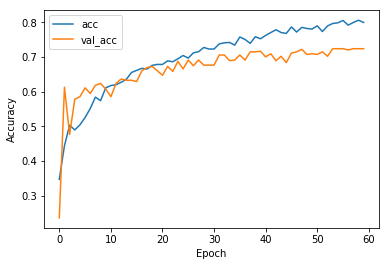

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
 
plt.plot(acc)
plt.plot(val_acc)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

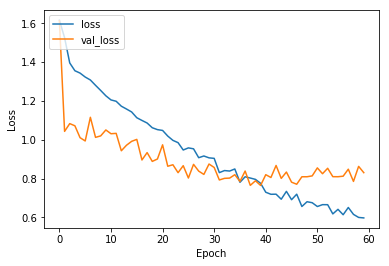

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
 
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [29]:
model.evaluate(X_test, y_test)

550/550 [==============================] - 0s 851us/sample - loss: 0.8304 - acc: 0.7236


[0.8304180309989235, 0.7236364]

In [0]:
# model.summary()

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
import itertools

prediction_vector = np.argmax(model.predict(X_test), axis=1)
label_vector = np.argmax(y_test, axis=1)

cm = confusion_matrix(label_vector,prediction_vector)
f1 = f1_score(label_vector,prediction_vector, average='weighted')
kappa = cohen_kappa_score(label_vector,prediction_vector,weights='quadratic')

cm_labels = ['No_DR','Mild','Moderate','Severe','Proliferate_DR']

## Print out model metrics

In [31]:
print(cm)
print('\nf1: '+str(f1))
print('\nkappa: '+str(kappa))

[[269  11  11   0   0]
 [  6  26   9   2   6]
 [  5  20  73   7  25]
 [  0   3   8  11   8]
 [  2   8  14   7  19]]

f1: 0.7302615206980834

kappa: 0.7638420105768342


In [0]:
# Boilerplate code from sklearn website
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[269  11  11   0   0]
 [  6  26   9   2   6]
 [  5  20  73   7  25]
 [  0   3   8  11   8]
 [  2   8  14   7  19]]


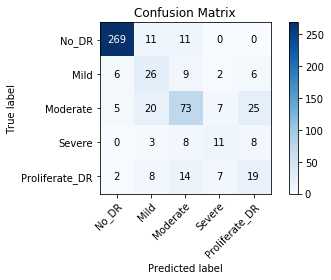

In [33]:
plot_confusion_matrix(label_vector, prediction_vector, cm_labels, title='Confusion Matrix')

Normalized confusion matrix
[[0.92439863 0.03780069 0.03780069 0.         0.        ]
 [0.12244898 0.53061224 0.18367347 0.04081633 0.12244898]
 [0.03846154 0.15384615 0.56153846 0.05384615 0.19230769]
 [0.         0.1        0.26666667 0.36666667 0.26666667]
 [0.04       0.16       0.28       0.14       0.38      ]]


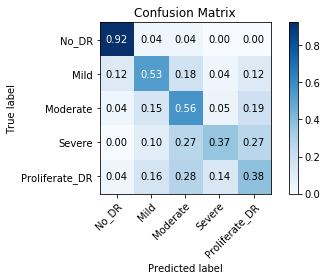

In [34]:
plot_confusion_matrix(label_vector, prediction_vector, cm_labels, normalize=True, title='Confusion Matrix')

In [0]:
# model.save("cnn1_trained.h5")